In [1]:
# 🛠️ Data Preprocessing & EDA - B5W8 Fraud Detection

# This notebook covers Task 1 of the B5W8 challenge, focusing on:
# - Data loading and cleaning
# - Feature engineering
# - Exploratory Data Analysis (EDA)
# - Class imbalance handling strategy


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ipaddress

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


# 📁 Load Data
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')
creditcard_df = pd.read_csv('../data/creditcard.csv')

fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
# 🔍 Data Cleaning & Preprocessing

# Check missing values
print("Fraud Dataset:\n", fraud_df.isnull().sum())
print("\nIP Dataset:\n", ip_df.isnull().sum())
print("\nCreditCard Dataset:\n", creditcard_df.isnull().sum())

# Drop duplicates
fraud_df.drop_duplicates(inplace=True)
creditcard_df.drop_duplicates(inplace=True)


Fraud Dataset:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

IP Dataset:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

CreditCard Dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# 🌍 Convert IP to Country

# Convert IP address to integer
fraud_df['ip_integer'] = fraud_df['ip_address']
# Merge by checking if ip_integer is between lower and upper bounds
def find_country(ip_int, ip_data):
    row = ip_data[(ip_data['lower_bound_ip_address'] <= ip_int) & 
                  (ip_data['upper_bound_ip_address'] >= ip_int)]
    return row['country'].values[0] if not row.empty else 'Unknown'

fraud_df['country'] = fraud_df['ip_integer'].apply(lambda x: find_country(x, ip_df))
fraud_df[['ip_address', 'country']].head()


,ip_address,country
0,7.327584e+08,Japan
1,3.503114e+08,United States
2,2.621474e+09,United States
3,3.840542e+09,Unknown
4,4.155831e+08,United States


In [5]:
# 🧠 Feature Engineering

# Convert time columns
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Feature: time since signup
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()

# Feature: hour of day & day of week
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

fraud_df[['time_since_signup', 'hour_of_day', 'day_of_week']].head()


,time_since_signup,hour_of_day,day_of_week
0,4506682.0,2,5
1,17944.0,1,0
2,1.0,18,3
3,492085.0,13,0
4,4361461.0,18,2


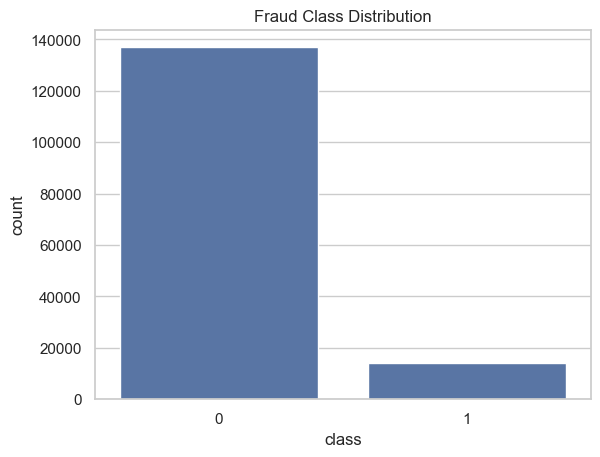

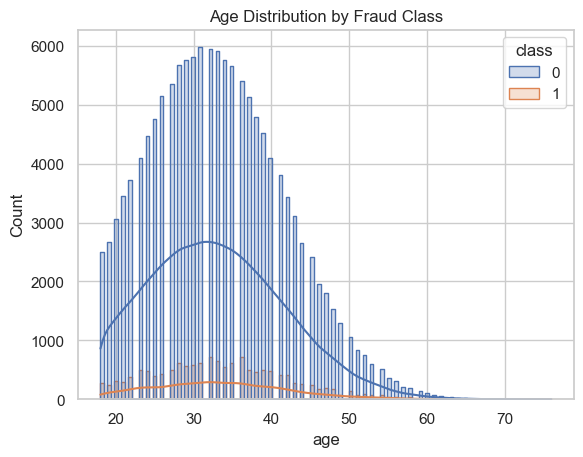

In [6]:
# 📊 Exploratory Data Analysis (EDA)

# Plot fraud vs non-fraud distribution
sns.countplot(x='class', data=fraud_df)
plt.title('Fraud Class Distribution')
plt.show()

# Age distribution by class
sns.histplot(data=fraud_df, x='age', hue='class', kde=True, element='step')
plt.title('Age Distribution by Fraud Class')
plt.show()


In [7]:
# ⚖️ Class Imbalance Strategy

fraud_distribution = fraud_df['class'].value_counts(normalize=True)
print('Fraud Class Distribution (%):')
print(fraud_distribution * 100)

# Commentary
print("""We observe a strong class imbalance in the fraud dataset.
We'll explore SMOTE (oversampling) and random undersampling in the model phase.
Only apply resampling to training data to avoid data leakage.""")


Fraud Class Distribution (%):
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64
We observe a strong class imbalance in the fraud dataset.
We'll explore SMOTE (oversampling) and random undersampling in the model phase.
Only apply resampling to training data to avoid data leakage.
